In [1]:
from network import Network
import networkx as nx

n_agents = 100
max_simulation_time = 200

# one of 'ABM-normal' or 'ABM-isolation' or 'ABM-generative'
#behaviour_model = 'ABM-normal'
behaviour_model = 'ABM-isolation'
#behaviour_model = 'ABM-generative'

network = Network(n_agents, behaviour_model)

# # # infect some random agents
network.agents[29].seir_state = 'A'
network.agents[30].seir_state = 'A'
network.agents[31].seir_state = 'A'
network.agents[32].seir_state = 'A'
network.agents[33].seir_state = 'I'
network.agents[34].seir_state = 'I'

# network.agents[1].seir_state = 'I'

network.run_simulation(max_simulation_time)
network.plot_trends()

{'name': 'MARIO', 'seir_state': 'S', 'behaviour': 'careless', 'reasoning': 'ABM-isolation: Agent is not infected, will use probabilities to decide', 'age': 44, 'id': 0, 'day': 0, 'n_symptomatic_agents': 2, 'go_to_work': True, 'take_private_transport': True, 'social_activity': True, 'wear_mask': True, 'n_friends_all': 7, 'n_friends_symptomatic': 0, 'n_coworkers_all': 5, 'n_coworkers_symptomatic': 0, 'n_household_all': 3, 'n_household_symptomatic': 0, 'prompt_situation_assessment': '', 'prompt_decision_making': '', 'prompt_decision_extraction': ''}
{'name': 'CRAIG', 'seir_state': 'S', 'behaviour': 'cautious', 'reasoning': 'ABM-isolation: Agent is not infected, will use probabilities to decide', 'age': 26, 'id': 1, 'day': 0, 'n_symptomatic_agents': 2, 'go_to_work': True, 'take_private_transport': True, 'social_activity': False, 'wear_mask': True, 'n_friends_all': 40, 'n_friends_symptomatic': 2, 'n_coworkers_all': 27, 'n_coworkers_symptomatic': 0, 'n_household_all': 0, 'n_household_symptom

ValueError: probabilities do not sum to 1

In [2]:
sum([0.146033, 0.119120, 0.099462, 0.108823, 0.088930, 0.064124, 0.051486, 0.059209, 0.033700, 0.067400, 0.018722, 0.026679, 0.014042, 0.009829, 0.032530, 0.010999, 0.005851, 0.007723, 0.004681, 0.030658])

1.0000010000000001

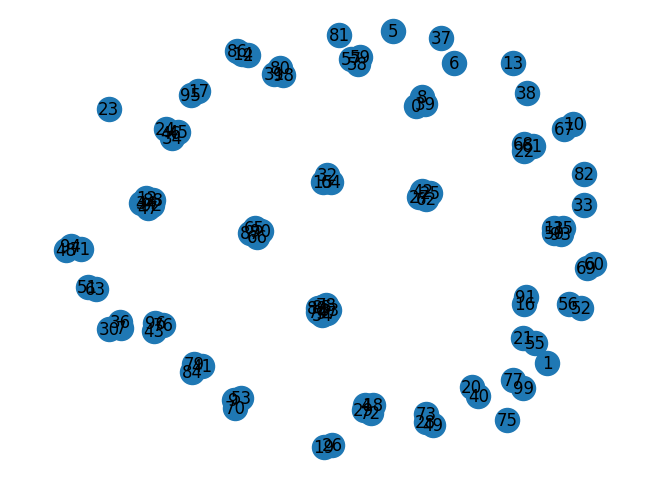

In [4]:
G = network.household_network
nx.draw(G, with_labels=True)

# Monte Carlo

In [22]:
import pandas as pd
n_agents = 500
max_simulation_time = 100
# one of 'ABM-normal' or 'ABM-isolation' or 'ABM-generative'
behaviour_model = 'ABM-normal'
#behaviour_model = 'ABM-isolation'

k = 50

list_of_cols_arrays = [[], [], [], [], [], [], []]

for _ in range(k):
    network = Network(n_agents, behaviour_model)

    # # infect some random agents
    network.agents[30].seir_state = 'A'
    network.agents[31].seir_state = 'A'
    network.agents[32].seir_state = 'I'
    network.agents[33].seir_state = 'I'

    network.run_simulation(max_simulation_time)

    days_infection_historical = network.days_infection_historical # step number

    if len(days_infection_historical) > 20: # if the simulation was too short, ignore it
        susceptible_historical = network.susceptible_historical
        exposed_historical = network.exposed_historical
        asymptomatic_historical = network.asymptomatic_historical
        infected_historical = network.infected_historical
        recovered_historical = network.recovered_historical

        mobility_historical = network.mobility_historical

        list_of_cols_arrays[0] += days_infection_historical
        list_of_cols_arrays[1] += susceptible_historical
        list_of_cols_arrays[2] += exposed_historical
        list_of_cols_arrays[3] += asymptomatic_historical
        list_of_cols_arrays[4] += infected_historical
        list_of_cols_arrays[5] += recovered_historical

        list_of_cols_arrays[6] += mobility_historical

No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping 

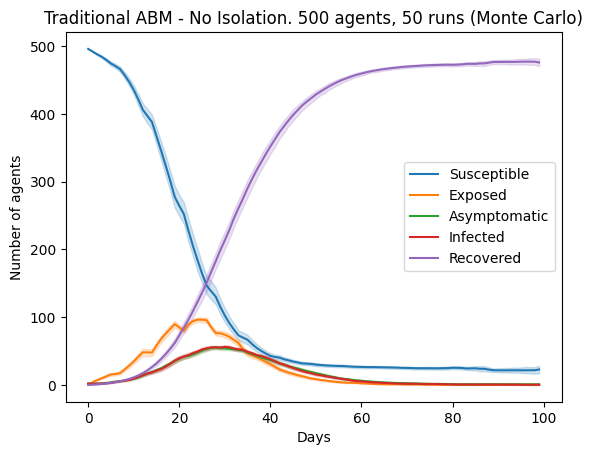

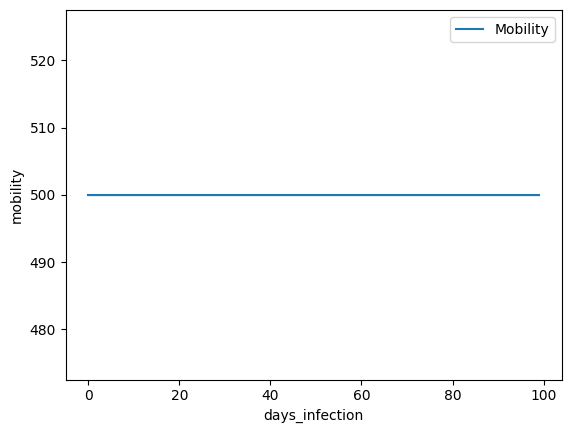

In [25]:
df = pd.DataFrame(list_of_cols_arrays).T
df.columns = ['days_infection', 'susceptible', 'exposed', 'asymptomatic', 'infected', 'recovered', 'mobility']

sns.lineplot(data = df, x = 'days_infection', y = 'susceptible', label = 'Susceptible')
sns.lineplot(data = df, x = 'days_infection', y = 'exposed', label = 'Exposed')
sns.lineplot(data = df, x = 'days_infection', y = 'asymptomatic', label = 'Asymptomatic')
sns.lineplot(data = df, x = 'days_infection', y = 'infected', label = 'Infected')
sns.lineplot(data = df, x = 'days_infection', y = 'recovered', label = 'Recovered')

# change y axis label
plt.ylabel('Number of agents')
plt.xlabel('Days')

plt.title('Traditional ABM - No Isolation. 500 agents, 50 runs (Monte Carlo)')

plt.show()

sns.lineplot(data = df, x = 'days_infection', y = 'mobility', label = 'Mobility')
plt.show()


In [26]:
import pandas as pd
n_agents = 500
max_simulation_time = 100
# one of 'ABM-normal' or 'ABM-isolation' or 'ABM-generative'
#behaviour_model = 'ABM-normal'
behaviour_model = 'ABM-isolation'

k = 50

list_of_cols_arrays = [[], [], [], [], [], [], []]

for _ in range(k):
    network = Network(n_agents, behaviour_model)

    # # infect some random agents
    network.agents[30].seir_state = 'A'
    network.agents[31].seir_state = 'A'
    network.agents[32].seir_state = 'I'
    network.agents[33].seir_state = 'I'

    network.run_simulation(max_simulation_time)

    days_infection_historical = network.days_infection_historical # step number

    if len(days_infection_historical) > 20: # if the simulation was too short, ignore it
        susceptible_historical = network.susceptible_historical
        exposed_historical = network.exposed_historical
        asymptomatic_historical = network.asymptomatic_historical
        infected_historical = network.infected_historical
        recovered_historical = network.recovered_historical

        mobility_historical = network.mobility_historical

        list_of_cols_arrays[0] += days_infection_historical
        list_of_cols_arrays[1] += susceptible_historical
        list_of_cols_arrays[2] += exposed_historical
        list_of_cols_arrays[3] += asymptomatic_historical
        list_of_cols_arrays[4] += infected_historical
        list_of_cols_arrays[5] += recovered_historical

        list_of_cols_arrays[6] += mobility_historical

No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.
No more infected agents. Stopping simulation.


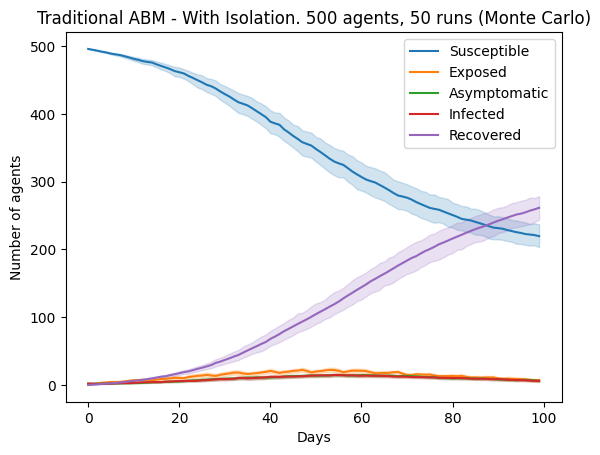

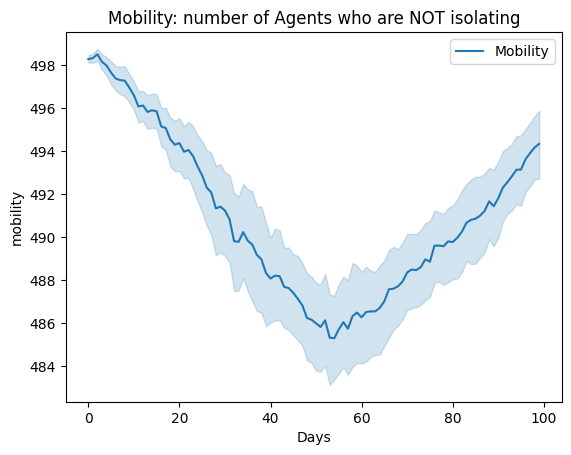

In [29]:
df = pd.DataFrame(list_of_cols_arrays).T
df.columns = ['days_infection', 'susceptible', 'exposed', 'asymptomatic', 'infected', 'recovered', 'mobility']

sns.lineplot(data = df, x = 'days_infection', y = 'susceptible', label = 'Susceptible')
sns.lineplot(data = df, x = 'days_infection', y = 'exposed', label = 'Exposed')
sns.lineplot(data = df, x = 'days_infection', y = 'asymptomatic', label = 'Asymptomatic')
sns.lineplot(data = df, x = 'days_infection', y = 'infected', label = 'Infected')
sns.lineplot(data = df, x = 'days_infection', y = 'recovered', label = 'Recovered')

# change y axis label
plt.ylabel('Number of agents')
plt.xlabel('Days')

plt.title('Traditional ABM - With Isolation. 500 agents, 50 runs (Monte Carlo)')

plt.show()

plt.title('Mobility: number of Agents who are NOT isolating')

sns.lineplot(data = df, x = 'days_infection', y = 'mobility', label = 'Mobility')

plt.xlabel('Days')

plt.show()


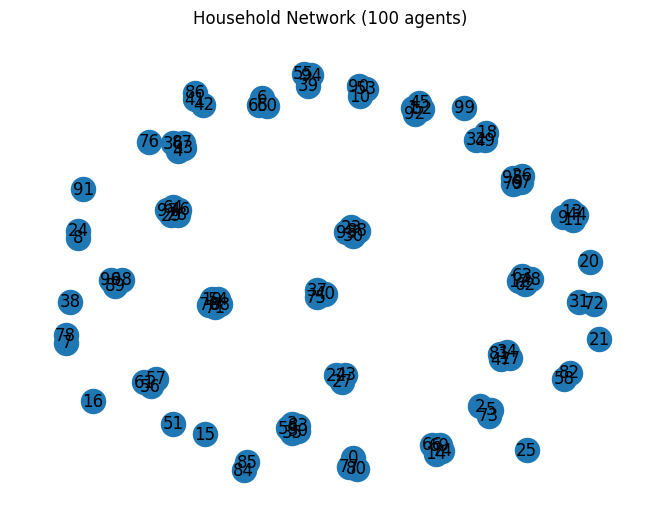

In [37]:

nx.draw(network.household_network, with_labels = True)
plt.title('Household Network (100 agents)')
plt.show()

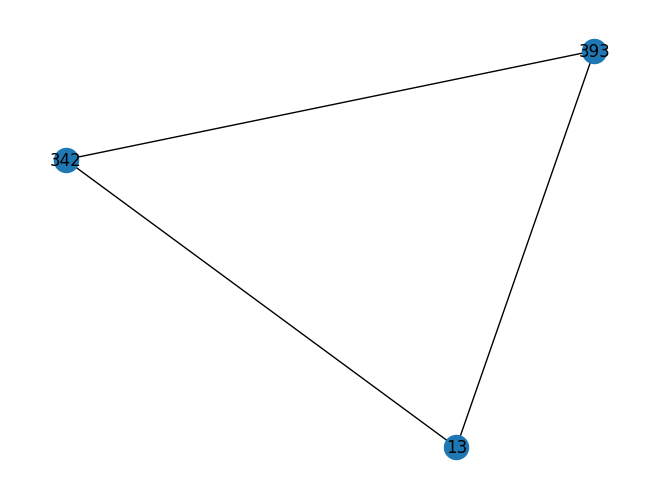

In [31]:
# Assuming network.household_network is your network graph
# Extract subgraph containing the 10th node and its neighbors
node_of_interest = 13
subgraph = nx.ego_graph(network.household_network, node_of_interest, radius=1)
nx.draw(subgraph, with_labels=True)


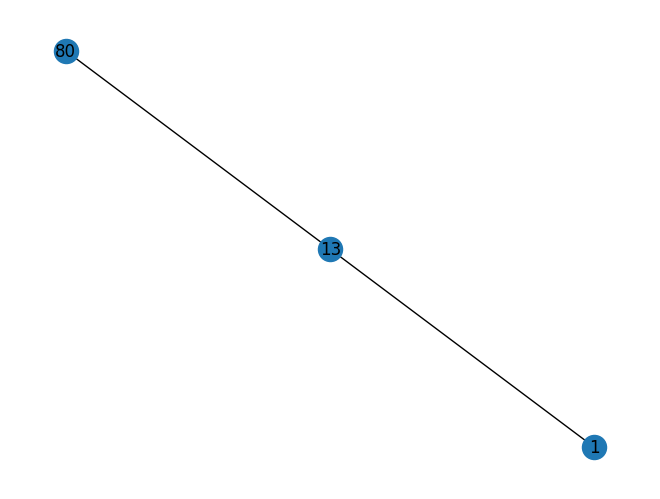

In [17]:
subgraph = nx.ego_graph(network.friendship_network, node_of_interest, radius=1)
nx.draw(subgraph, with_labels=True)


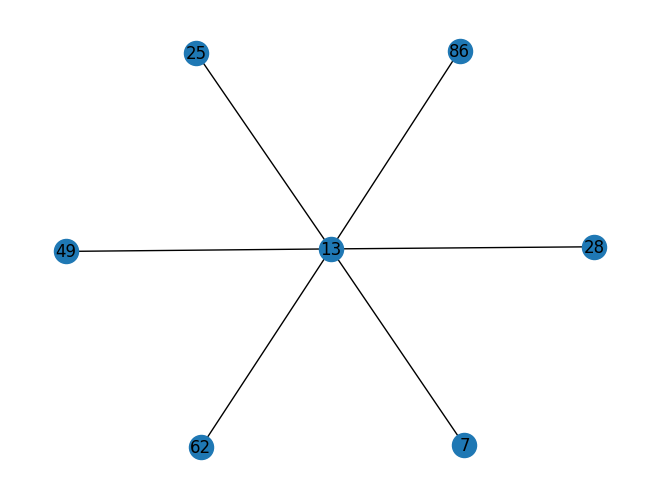

In [18]:
subgraph = nx.ego_graph(network.workplace_network, node_of_interest, radius=1)
nx.draw(subgraph, with_labels=True)

In [3]:
network.agents[100].household_connections

[Agent #254, Agent #308, Agent #391, Agent #337]

In [12]:
perc_pop_infected = 0.029
int(perc_pop_infected*100)

2

In [4]:
network.agents[100].telemetry

[{'day': 0,
  'perc_pop_infected': 0.0,
  'seir_state': 'S',
  'reasoning': 'ABM-isolation: Agent is not infected, going to work and socializing',
  'go_to_work': True,
  'take_private_transport': False,
  'social_activity': True,
  'wear_mask': False,
  'n_friends_all': 2,
  'n_friends_symptomatic': 0,
  'n_coworkers_all': 1,
  'n_coworkers_symptomatic': 0,
  'n_household_all': 4,
  'n_household_symptomatic': 0},
 {'day': 1,
  'perc_pop_infected': 0.6,
  'seir_state': 'S',
  'reasoning': 'ABM-isolation: Agent is not infected, going to work and socializing',
  'go_to_work': True,
  'take_private_transport': False,
  'social_activity': True,
  'wear_mask': False,
  'n_friends_all': 2,
  'n_friends_symptomatic': 0,
  'n_coworkers_all': 1,
  'n_coworkers_symptomatic': 0,
  'n_household_all': 4,
  'n_household_symptomatic': 0},
 {'day': 2,
  'perc_pop_infected': 0.6,
  'seir_state': 'S',
  'reasoning': 'ABM-isolation: Agent is not infected, going to work and socializing',
  'go_to_work': T

Text(0.5, 1.0, 'Friendship Network (100 agents)')

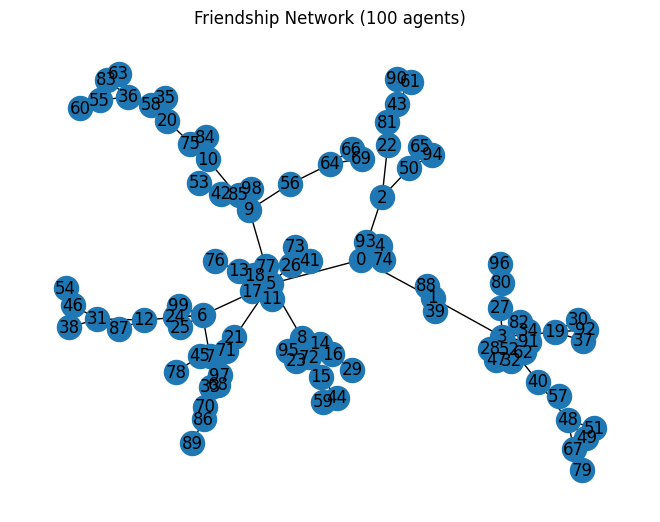

In [39]:
nx.draw(network.friendship_network, with_labels = True)
plt.title('Friendship Network (100 agents)')

In [21]:
network.agents[900].friend_connections

[Agent #50]

In [22]:
network.agents[900].household_connections

[Agent #563, Agent #444, Agent #492, Agent #83]

In [24]:
network.agents[900].workplace_connections

[Agent #670]